In [42]:
import numpy as np
import matplotlib.pyplot as plt
import math
import random

In [179]:
# Drawing.
def draw_shape(s, label, transparent=False):
    tmp = np.vstack([s, s[0]])
    a = 0.6 if transparent else 1.0
    plt.plot(tmp[:,0], tmp[:,1], alpha=a, label=label)

# Transforming.
def transform(s, transforms):
    s = np.hstack([s, [[1.]]*s.shape[0]])
    for t in transforms:
        s = np.matmul(s, t)
    return s

def translate(dx, dy):
    return np.array([
        [1,0,0],
        [0,1,0],
        [dx,dy,1]
    ])

def roundup(x, amount=10):
    return int(math.ceil(x / float(amount))) * amount

def rotate(p):
    p = math.radians(p)
    s, c = math.sin(p), math.cos(p)
    return np.array([
        [c,s,0],
        [-s,c,0],
        [0,0,1]
    ])

def scale(sx, sy):
    return np.array([
        [sx,0,0],
        [0,sy,0],
        [0,0,1]
    ])

def generate_random_transforms(num):
    arr = []
    for _ in range(num):
        c = random.randrange(3)
        if c == 0:
            arr.append(translate(random.randint(-5,5),random.randint(-5,5)))
        if c == 1:
            arr.append(rotate(random.randint(-180,180)))
        if c == 2:
            arr.append(scale(random.randint(-3,3),random.randint(-3,3)))
    return arr

In [187]:
# Starting shape.
start = np.array([
    [0,0],
    [2,0],
    [1,2],
    [0,2]
])

def create_target(seed, t_num=3):
    # Target shape.
    random.seed(seed)
    target = transform(start, generate_random_transforms(t_num))

    # Draw shapes.
    plt.figure(figsize=(4,4), dpi=120)
    draw_shape(start, 'before')
    draw_shape(target, 'after')
    plt.legend()
    plt.grid()
    plt.title('Reconstruct this transformation.')
    plt.show()
    
    return target

def test_solution(attempt):
    # Transform original.
    attempt = transform(start, transforms)

    # Print message.
    if np.array_equal(target, attempt):
        print(random.choice(['GREAT JOB!', 'AMAZING!', 'SUPERB!', 'YOU MADE IT!', 'YOU DID IT!']))
    else:
        print(random.choice(['Almost...', 'Getting there...', 'Yes, yes, missing just a touch...', 'Getting closer...', 'Don\'t give up, you\'re getting there...', 'Closer...', 'You\'re getting a hang of this.']))

    # Draw shapes.
    plt.figure(figsize=(4,4), dpi=120)
    draw_shape(attempt, 'your')
    draw_shape(target, 'target', True)
    plt.legend()
    plt.grid()
    plt.show()

# It's your time to shine!

Try reconstructing the transformations in-order from the given start and target shape (without peeking).

**Keep in mind, all parameters will be integers! Rotations are in degrees and will be rounded to nearest 10 degrees.**

**Available commands:**
* `transforms.append(translate(dx,dy))`
* `transforms.append(rotate(phi))`
* `transforms.append(scale(sx,sy))`


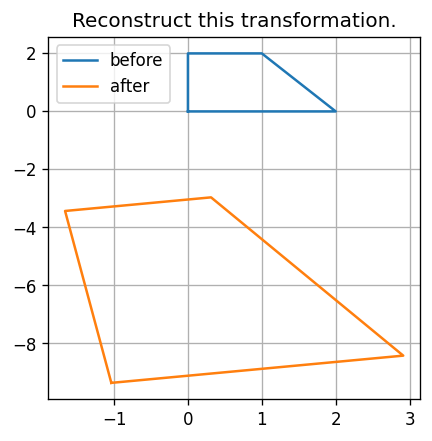

In [214]:
# Change the task by changing the seed.
SEED = 43
target = create_target(SEED)

Getting closer...


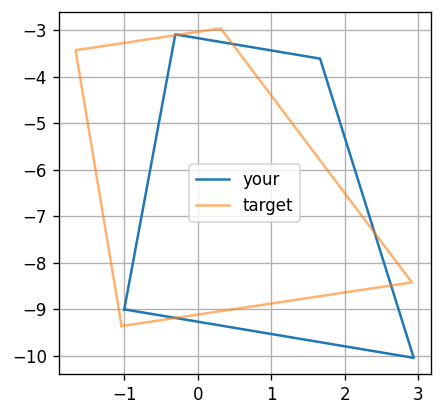

In [213]:
transforms = []

### BEGIN


transforms.append(rotate(180-10))
transforms.append(scale(-2, -3))
transforms.append(translate(-1, -9))


### END

test_solution(attempt)